In [1]:
import pandas as pd
import pyddm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.optimize as optimize
from scipy.stats import norm

In [2]:
#read the data
df_exp=pd.read_csv('./Haddara2022Expt2_clean.csv')

#data clean & new columns
df_exp=df_exp.loc[(df_exp['RT_dec'] >=0.2) & (df_exp['RT_dec'] <=2)].reset_index()
df_exp["Correct"]=(df_exp.Stimulus==df_exp.Response)*1

df_exp.head()

lens = []
for s in df_exp.Subj_idx.unique():
    df1 = df_exp.loc[df_exp['Subj_idx'] == s].reset_index()
    lens.append(df1.shape[0])
    

model = pd.read_csv('./models_results/extended_pydd_params.csv').assign(len_df = lens)
base_model = pd.read_csv('./models_results/extended_pydd_params_baseline.csv').assign(len_df = lens)
noisy_model = pd.read_csv('./models_results/extended_pydd_params_noisy.csv')

model['AIC'] = 2 * 7 + 2 * model['LL']
# BIC = len(result.x) * np.log(df1.shape[0]) - 2 * result.fun
model['BIC'] = 7*np.log(model['len_df']) + 2 * model['LL']

base_model['AIC'] = 2 * 6 + 2 * base_model['LL']
# BIC = len(result.x) * np.log(df1.shape[0]) - 2 * result.fun
base_model['BIC'] = 6*np.log(base_model['len_df']) + 2 * base_model['LL']

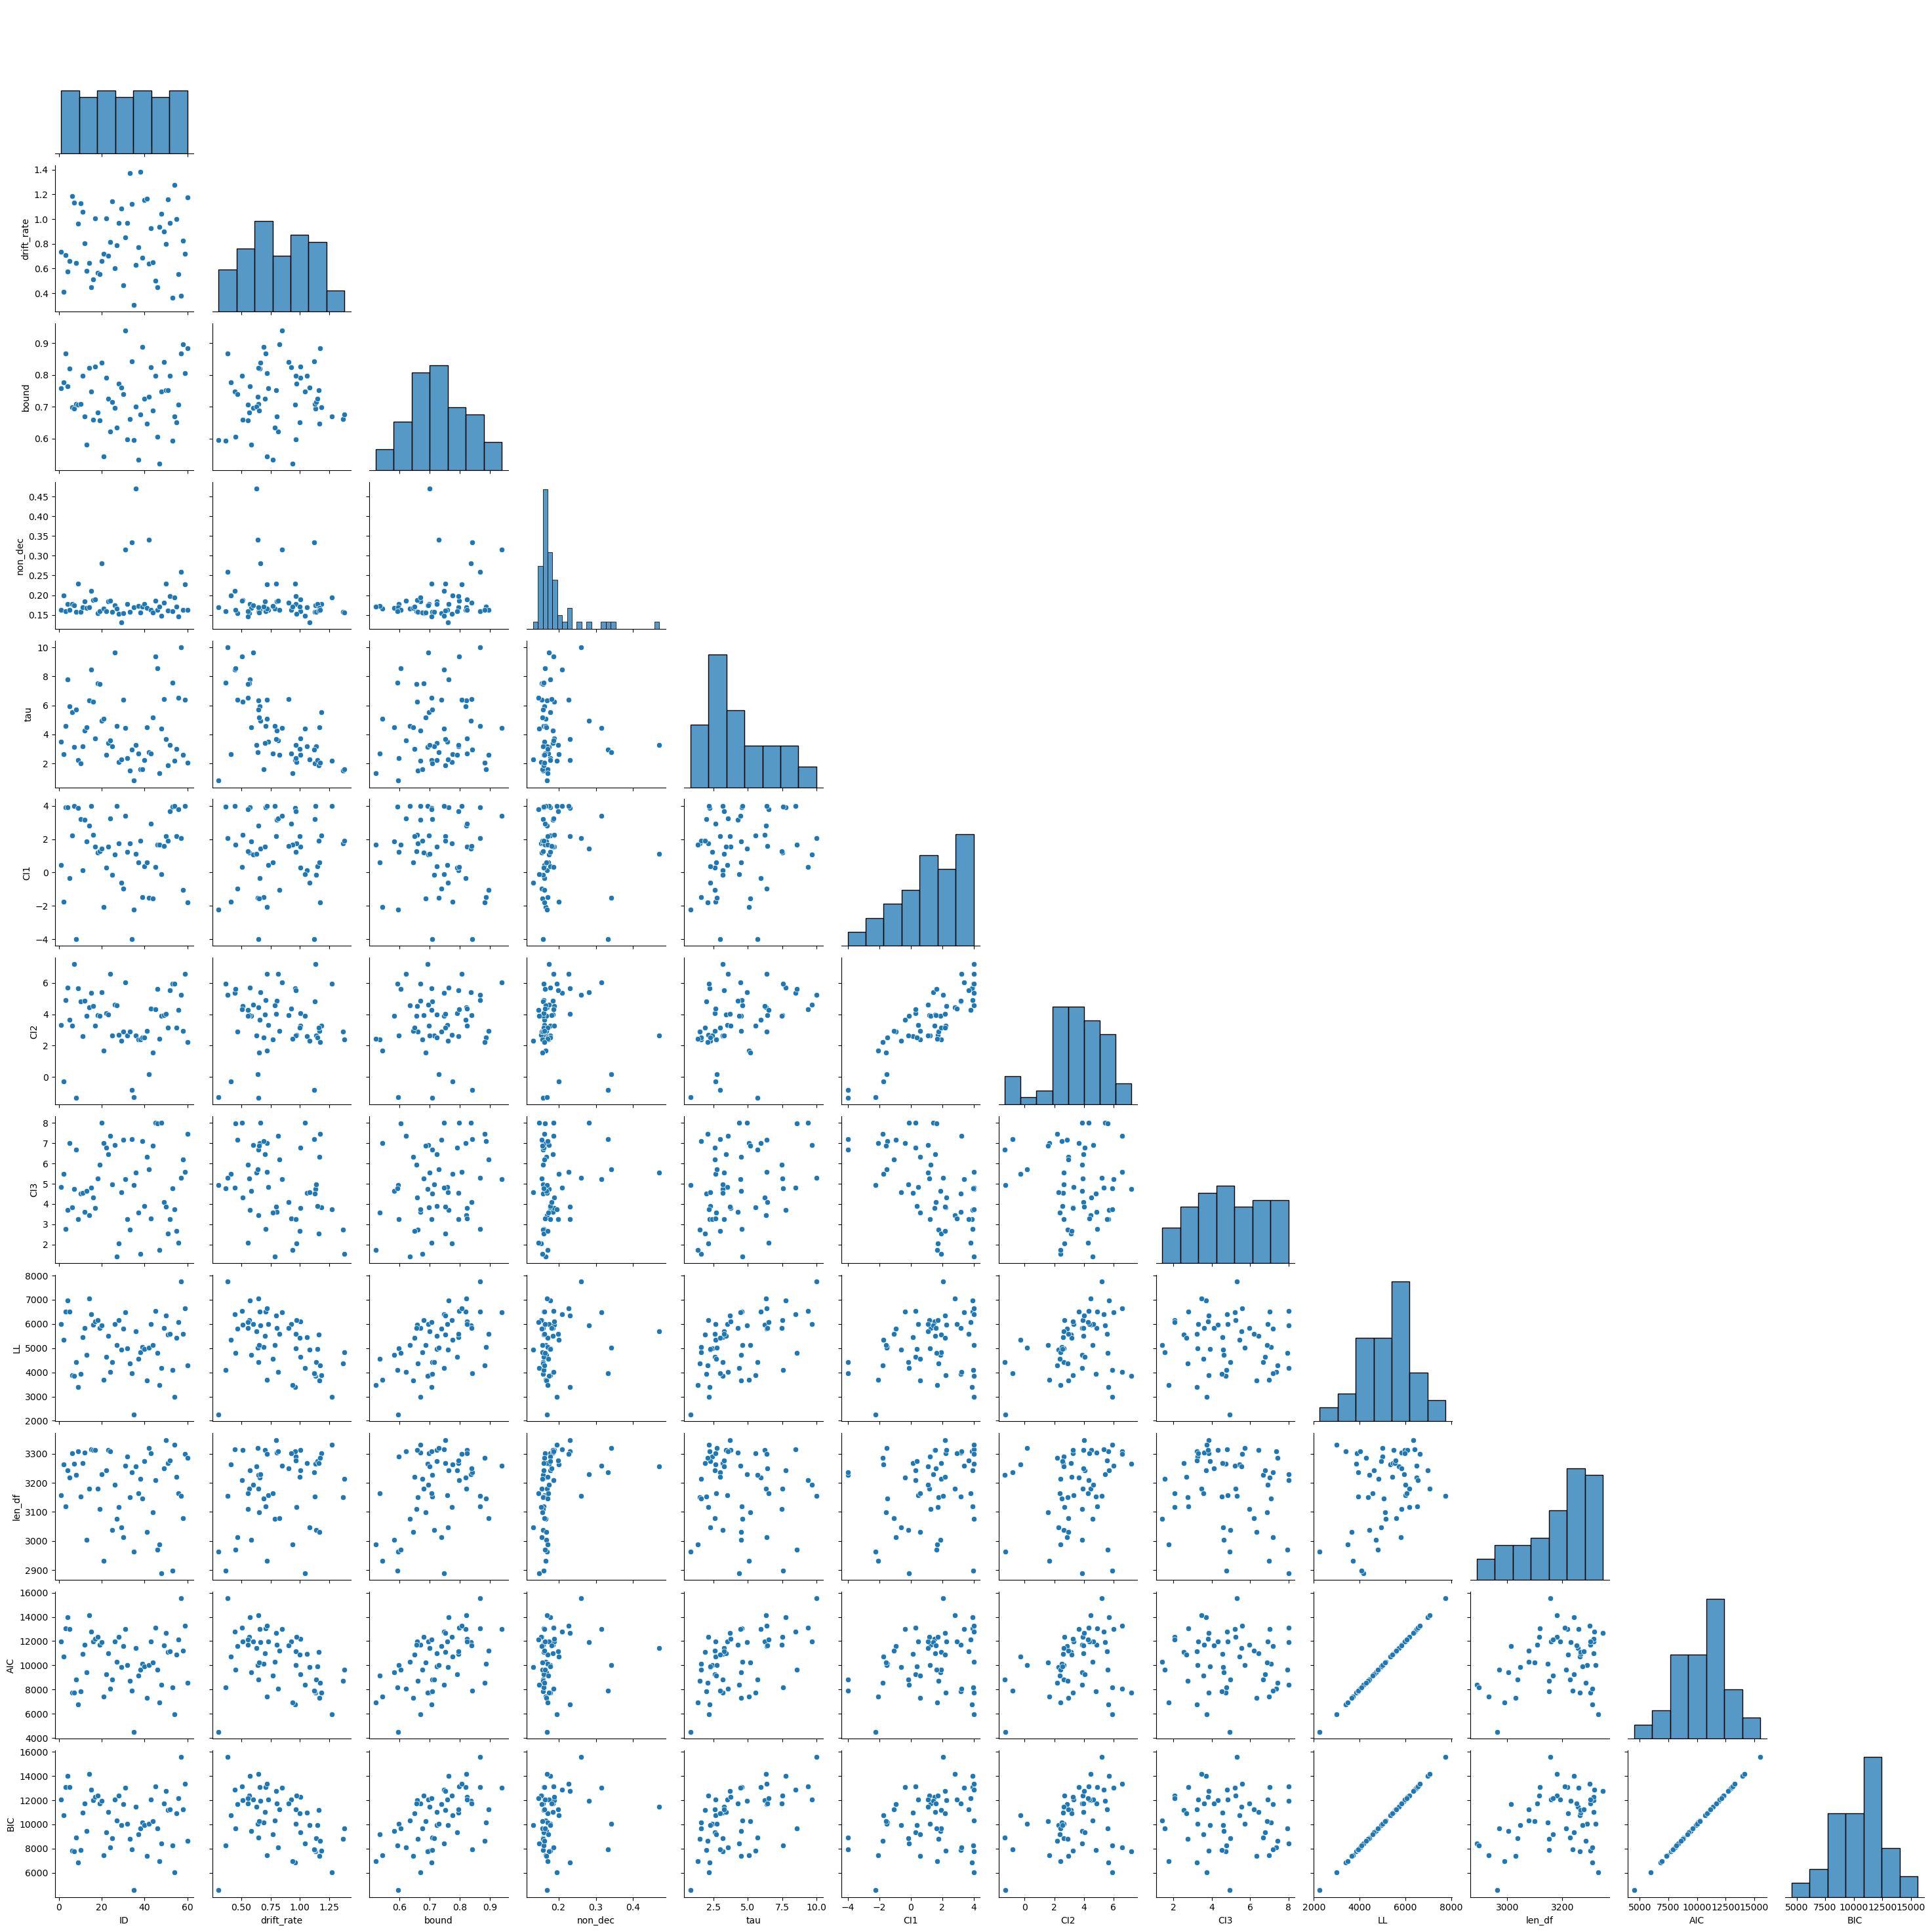

In [7]:
sb.pairplot(model, corner = True)

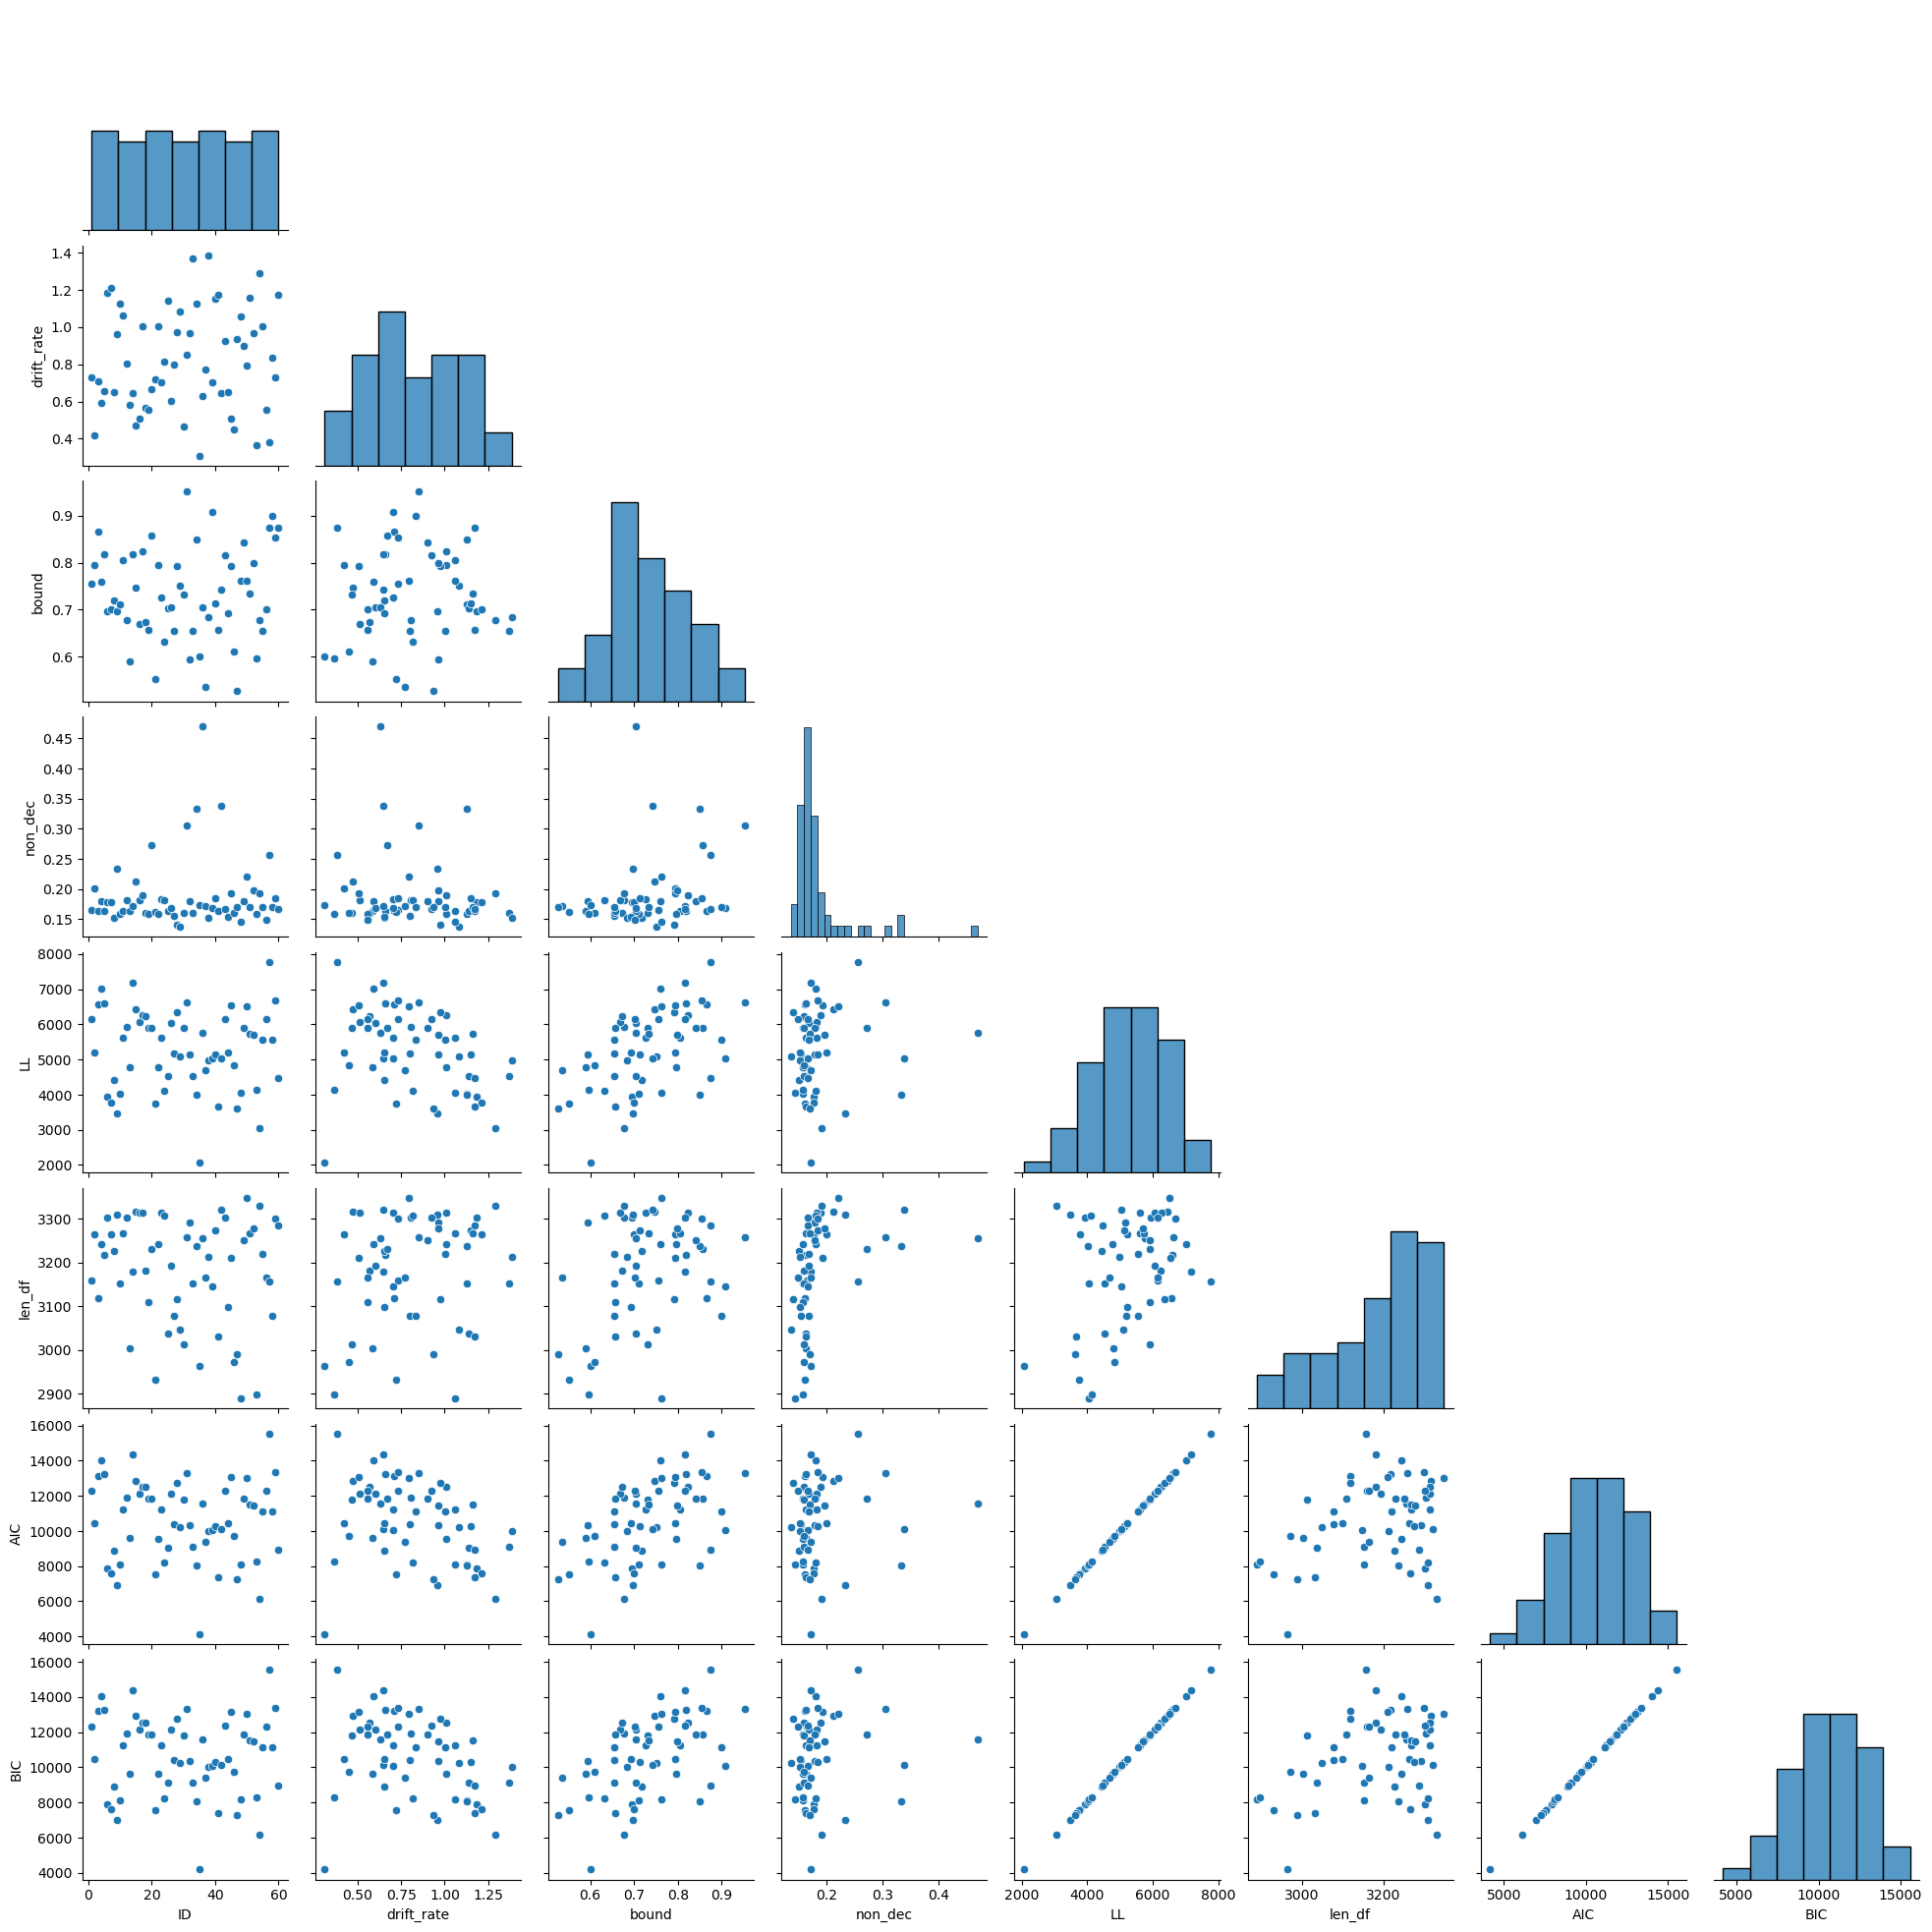

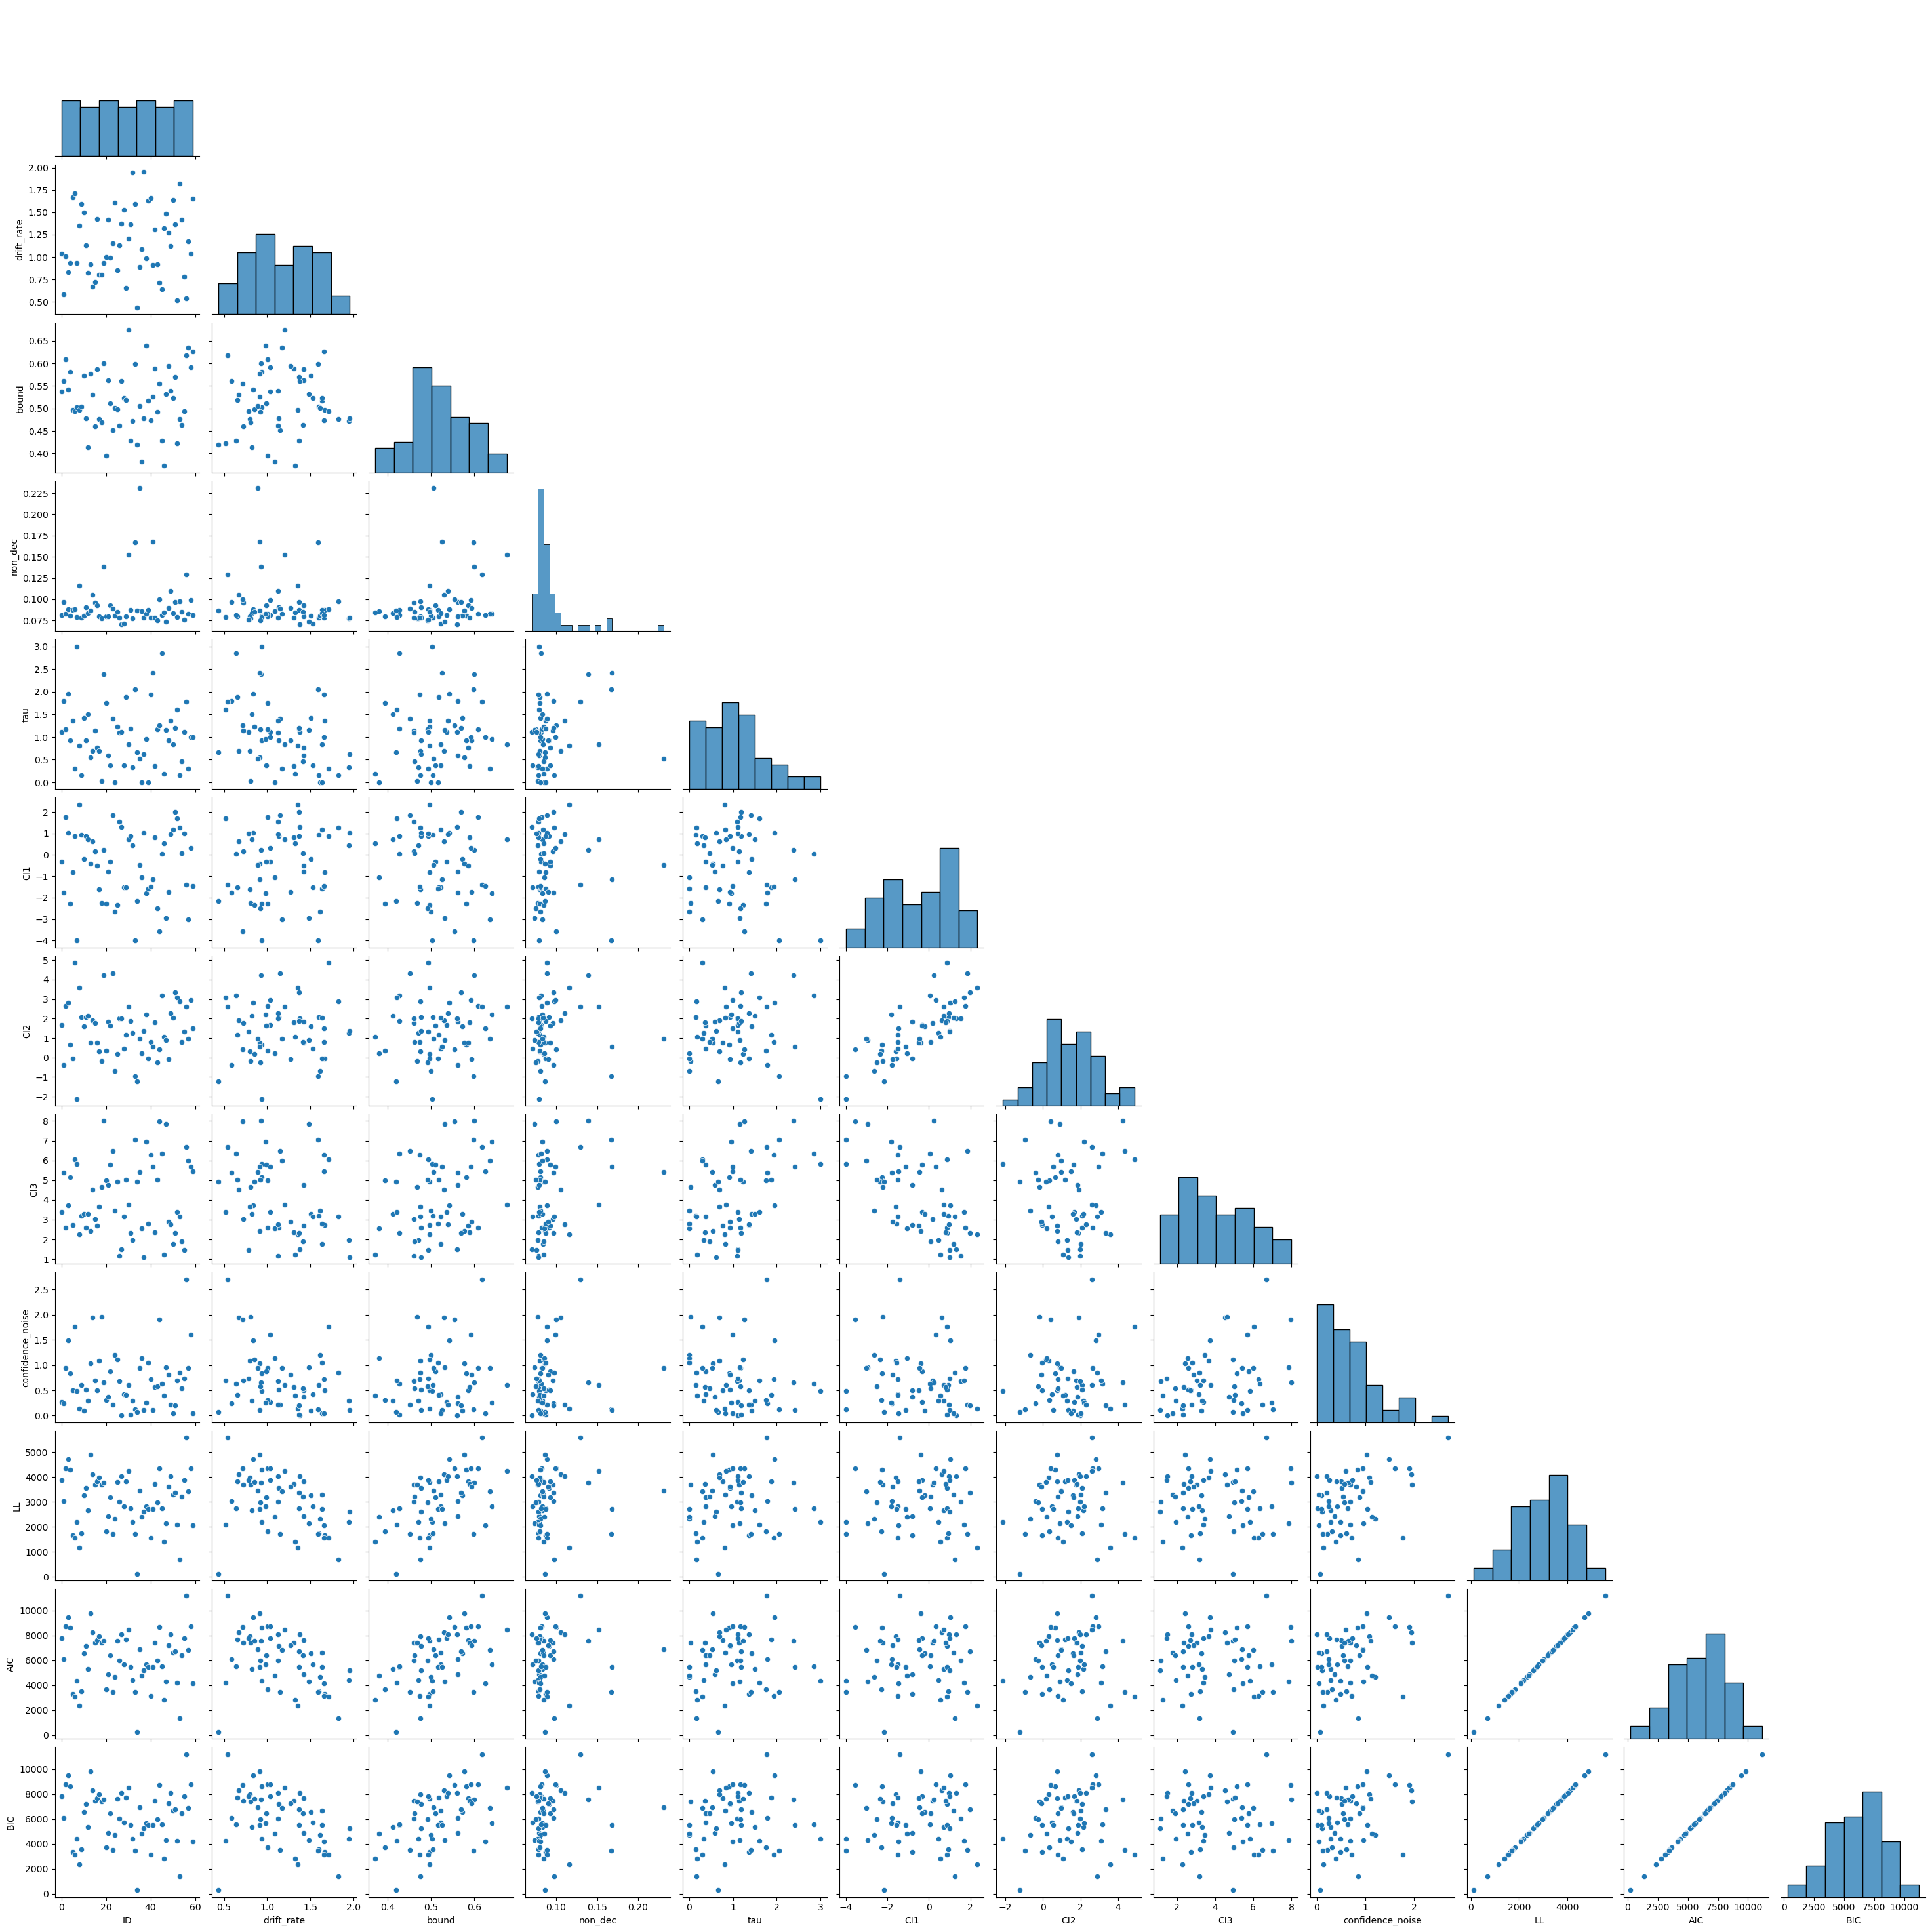

In [8]:
sb.pairplot(base_model, corner = True)
sb.pairplot(noisy_model, corner = True)

/tmp/ipykernel_25411/827540284.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(model.BIC - base_model.BIC)
/tmp/ipykernel_25411/827540284.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(noisy_model.BIC - base_model.BIC)


<Axes: xlabel='BIC', ylabel='Density'>

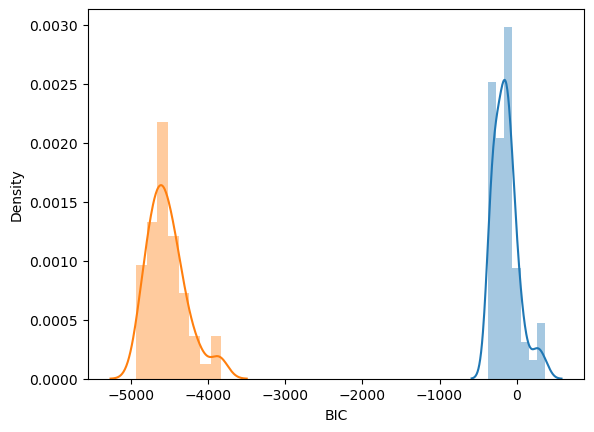

In [14]:
sb.distplot(model.BIC - base_model.BIC)
sb.distplot(noisy_model.BIC - base_model.BIC)

In [13]:
np.mean((model.LL - noisy_model.LL) / model.len_df)

0.6900011532564089

In [14]:
np.sum(noisy_model.LL < base_model.LL)/(noisy_model.shape[0])

1.0

<Axes: >

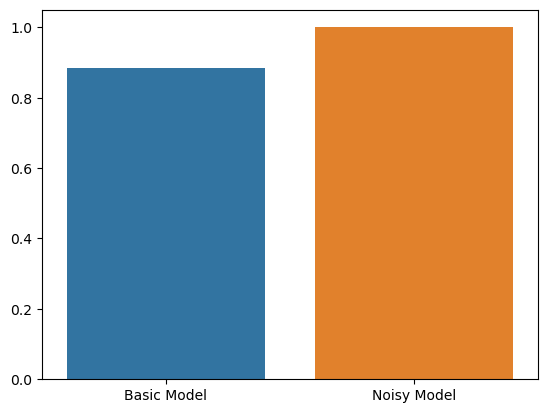

In [15]:
sb.barplot(x = ['Basic Model', 'Noisy Model'],y = [np.sum(model.LL < base_model.LL)/(model.shape[0]), np.sum(noisy_model.LL < base_model.LL)/(noisy_model.shape[0])])

In [ ]:
m = 
sol = m.solv

solve.pdf['correct']
solve.pdf['error']


solve.prob['correct']
...

confidence =>  data



# CrossValidation

In [3]:
cv_model = pd.read_csv('./models_results/extended_pydd_params_noisy_cv.csv')

In [8]:
sb.barplot(x = np.array(['Train', 'Test']), y  = np.array([cv_model.cv_train.values, cv_model.cv_test.values]))

ValueError: Data must be 1-dimensional